In [1]:
# import basic python libraries
import numpy as np
import pandas as pd

# load sequence data
sequence_data = pd.read_csv('Waltz_Data_Filtered')

training_data = sequence_data.drop(['Classification', 'Sequence'], axis = 1)
target_data = sequence_data['Classification']

In [2]:
# import data pre-processing package
from sklearn.model_selection import train_test_split

# Split the dataset in two training and test sets: use an 80:20 split
X_train, X_test, y_train, y_test = train_test_split(training_data, target_data, test_size = 0.2)

In [3]:
# list the four machine learning methods to be used
methods = ['svm', 'forest', 'logistic', 'mlp']

In [4]:
# define a dictionary of parameters for each machine learning method
parameters = {'svm' :      {'kernel': ['linear', 'rbf'], # choice of kernel function
                            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], # error term penalty parameter
                            'gamma': [0.001, 0.01, 0.1]}, # kernel coefficient (rbf only)
              
              'forest' :   {'n_estimators': [10, 100, 1000], # number of decision trees in forest
                            'max_depth': [1, 10, 100, 1000]}, # maximum tree depth
              
              'logistic' : {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, # inverse of regularization strength
              
              'mlp' :      {'activation' : ['identity', 'logistic', 'tanh'], # mlp activation function
                            'hidden_layer_sizes' : [(10, 1), (20, 1), (30, 1), (50, 1)], # size of single hidden layer
                            'learning_rate_init' : [0.1, 0.01, 0.001, 0.0001, 0.00001]} # training rate
             }

In [5]:
# import grid search package and machine learning libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

num_folds = 10 # we are doing 10-fold cross validation
perf_metric = 'roc_auc' # use mean area under ROC curve for performance evaluation 

# define dictionary of classifier objects for each machine learning method
classifiers = {'svm' : GridSearchCV(SVC(probability = True), parameters['svm'], cv = num_folds, scoring = perf_metric),
               'forest' : GridSearchCV(RandomForestClassifier(), parameters['forest'], cv = num_folds, scoring = perf_metric),
               'logistic' : GridSearchCV(LogisticRegression(), parameters['logistic'], cv = num_folds, scoring = perf_metric),
               'mlp' : GridSearchCV(MLPClassifier(max_iter = 1000), parameters['mlp'], cv = num_folds, scoring = perf_metric)
              }

# train each method on the training data
for method in methods:
    classifiers[method].fit(X_train, y_train)

C:\Users\Frederick Russo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Frederick Russo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Frederick Russo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Frederick Russo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Frederi

In [6]:
# collect results for each grid search into a dictionary
results = {}
for method in methods:
    # mean_test_score is the overall set of results for each 10-fold cross validation
    results.update({method : {'mean_test_score' : classifiers[method].cv_results_['mean_test_score'].tolist()}})
    for parameter in parameters[method]:
        # save results listed by each parameter value
        results[method].update({parameter : classifiers[method].cv_results_['param_' + parameter].compressed().tolist()})

In [7]:
# zip results together for each method, into a list of tuples, and also add an index entry to identify each parameter
for method in methods:
    results[method]['zip'] = list(zip(*[results[method][x] for x in parameters[method]], results[method]['mean_test_score']))
    results[method]['zip_index'] = list([x for x in parameters[method]])

In [8]:
# define parameters for plotting
kernel_index = results['svm']['zip_index'].index('kernel')
gamma_index = results['svm']['zip_index'].index('gamma')
svm_linear_C = parameters['svm']['C']
svm_linear_results = [x[3] for x in results['svm']['zip'] if x[kernel_index] == 'linear' and x[gamma_index] == 0.1]

rbf_gamma_1_results = [x[3] for x in results['svm']['zip'] if (x[kernel_index] == 'rbf') and (x[gamma_index] == 0.1)]
rbf_gamma_01_results = [x[3] for x in results['svm']['zip'] if (x[kernel_index] == 'rbf') and (x[gamma_index] == 0.01)]
rbf_gamma_001_results = [x[3] for x in results['svm']['zip'] if (x[kernel_index] == 'rbf') and (x[gamma_index] == 0.001)]

depth_index = results['forest']['zip_index'].index('max_depth')
forest_max_depth_1_results = [x[2] for x in results['forest']['zip'] if (x[depth_index] == 1)]
forest_max_depth_10_results = [x[2] for x in results['forest']['zip'] if (x[depth_index] == 10)]
forest_max_depth_100_results = [x[2] for x in results['forest']['zip'] if (x[depth_index] == 100)]
forest_max_depth_1000_results = [x[2] for x in results['forest']['zip'] if (x[depth_index] == 1000)]

forest_n_estimators = parameters['forest']['n_estimators']

logistic_C = parameters['logistic']['C']
logistic_results = [x[1] for x in results['logistic']['zip']]

mlp_learning_rate_init = parameters['mlp']['learning_rate_init']

activation_index = results['mlp']['zip_index'].index('activation')
size_index = results['mlp']['zip_index'].index('hidden_layer_sizes')
mlp_identity_10_results = [x[3] for x in results['mlp']['zip'] if (x[activation_index] == 'identity') and (x[size_index] == (10, 1))]
mlp_identity_20_results = [x[3] for x in results['mlp']['zip'] if (x[activation_index] == 'identity') and (x[size_index] == (20, 1))]
mlp_identity_30_results = [x[3] for x in results['mlp']['zip'] if (x[activation_index] == 'identity') and (x[size_index] == (30, 1))]
mlp_identity_50_results = [x[3] for x in results['mlp']['zip'] if (x[activation_index] == 'identity') and (x[size_index] == (50, 1))]

mlp_logistic_10_results = [x[3] for x in results['mlp']['zip'] if (x[activation_index] == 'logistic') and (x[size_index] == (10, 1))]
mlp_logistic_20_results = [x[3] for x in results['mlp']['zip'] if (x[activation_index] == 'logistic') and (x[size_index] == (20, 1))]
mlp_logistic_30_results = [x[3] for x in results['mlp']['zip'] if (x[activation_index] == 'logistic') and (x[size_index] == (30, 1))]
mlp_logistic_50_results = [x[3] for x in results['mlp']['zip'] if (x[activation_index] == 'logistic') and (x[size_index] == (50, 1))]

mlp_tanh_10_results = [x[3] for x in results['mlp']['zip'] if (x[activation_index] == 'tanh') and (x[size_index] == (10, 1))]
mlp_tanh_20_results = [x[3] for x in results['mlp']['zip'] if (x[activation_index] == 'tanh') and (x[size_index] == (20, 1))]
mlp_tanh_30_results = [x[3] for x in results['mlp']['zip'] if (x[activation_index] == 'tanh') and (x[size_index] == (30, 1))]
mlp_tanh_50_results = [x[3] for x in results['mlp']['zip'] if (x[activation_index] == 'tanh') and (x[size_index] == (50, 1))]

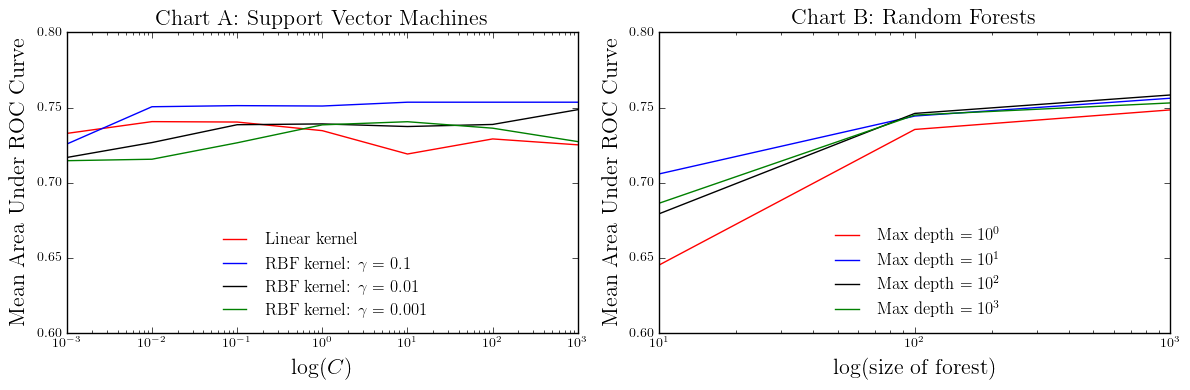

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as patches
from matplotlib import pylab
from matplotlib.ticker import FormatStrFormatter

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'cm'

fig, (ax1, ax2) = plt.subplots(1, 2, sharex = False, sharey = False, figsize = (12, 4))

# Select left subplot.
ax1 = plt.subplot(1, 2, 1)

ax1.semilogx(svm_linear_C, svm_linear_results, color = 'red')
ax1.semilogx(svm_linear_C, rbf_gamma_1_results, color = 'blue')
ax1.semilogx(svm_linear_C, rbf_gamma_01_results, color = 'black')
ax1.semilogx(svm_linear_C, rbf_gamma_001_results, color = 'green')

ax1.set_title('Chart A: Support Vector Machines', fontsize = 16)
ax1.set_xlabel(r'$\log(C)', fontsize = 16)
ax1.set_ylabel('Mean Area Under ROC Curve', fontsize = 16)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax1.set_ylim(0.60, 0.80)

linear_line = mlines.Line2D([], [], linestyle = '-', color = 'red', label = 'Linear kernel')
gamma_1 = mlines.Line2D([], [], linestyle = '-', color = 'blue', label = r'RBF kernel: $\gamma = 0.1$')
gamma_01 = mlines.Line2D([], [], linestyle = '-', color = 'black', label = r'RBF kernel: $\gamma = 0.01$')
gamma_001 = mlines.Line2D([], [], linestyle = '-', color = 'green', label = r'RBF kernel: $\gamma = 0.001$')
plt.legend(handles = [linear_line, gamma_1, gamma_01, gamma_001], loc = 'lower center', frameon = False)

# Select right subplot.
ax2 = plt.subplot(1, 2, 2)

# Add lines.
ax2.semilogx(forest_n_estimators, forest_max_depth_1_results, color = 'red')
ax2.semilogx(forest_n_estimators, forest_max_depth_10_results, color = 'blue')
ax2.semilogx(forest_n_estimators, forest_max_depth_100_results, color = 'black')
ax2.semilogx(forest_n_estimators, forest_max_depth_1000_results, color = 'green')

ax2.set_title('Chart B: Random Forests', fontsize = 16)
ax2.set_xlabel(r'$\log($size of forest$)', fontsize = 16)
ax2.set_ylabel('Mean Area Under ROC Curve', fontsize = 16)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax2.set_ylim(0.60, 0.80)

forest_1 = mlines.Line2D([], [], linestyle = '-', color = 'red', label = r'Max depth $= 10^0$')
forest_10 = mlines.Line2D([], [], linestyle = '-', color = 'blue', label = r'Max depth $= 10^1$')
forest_100 = mlines.Line2D([], [], linestyle = '-', color = 'black', label = r'Max depth $= 10^2$')
forest_1000 = mlines.Line2D([], [], linestyle = '-', color = 'green', label = r'Max depth $= 10^3$')
plt.legend(handles = [forest_1, forest_10, forest_100, forest_1000], loc = 'lower center', frameon = False)

plt.tight_layout()
plt.show()
fig.savefig('GridSearchSVM&RandomForest.png', dpi = 1000)

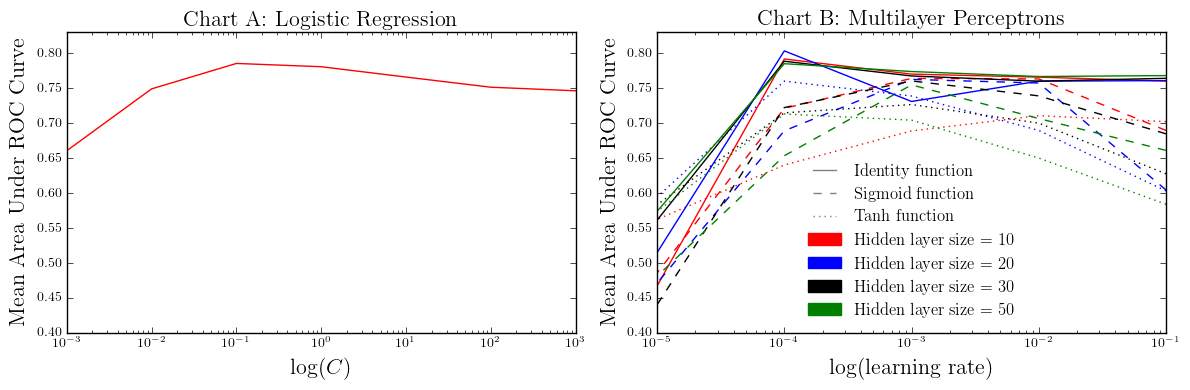

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = False, sharey = False, figsize = (12, 4))

# Select left subplot.
ax1 = plt.subplot(1, 2, 1)

ax1.semilogx(logistic_C, logistic_results, color = 'red')

ax1.set_title('Chart A: Logistic Regression', fontsize = 16)
ax1.set_xlabel(r'$\log(C)$', fontsize = 16)
ax1.set_ylabel('Mean Area Under ROC Curve', fontsize = 16)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax1.set_ylim(0.40, 0.83)

# Select right subplot.
ax2 = plt.subplot(1, 2, 2)

ax2.semilogx(mlp_learning_rate_init, mlp_identity_10_results, color = 'red', linestyle = '-')
ax2.semilogx(mlp_learning_rate_init, mlp_logistic_10_results, color = 'red', linestyle = '--')
ax2.semilogx(mlp_learning_rate_init, mlp_tanh_10_results, color = 'red', linestyle = 'dotted')

ax2.semilogx(mlp_learning_rate_init, mlp_identity_20_results, color = 'blue', linestyle = '-')
ax2.semilogx(mlp_learning_rate_init, mlp_logistic_20_results, color = 'blue', linestyle = '--')
ax2.semilogx(mlp_learning_rate_init, mlp_tanh_20_results, color = 'blue', linestyle = 'dotted')

ax2.semilogx(mlp_learning_rate_init, mlp_identity_30_results, color = 'black', linestyle = '-')
ax2.semilogx(mlp_learning_rate_init, mlp_logistic_30_results, color = 'black', linestyle = '--')
ax2.semilogx(mlp_learning_rate_init, mlp_tanh_30_results, color = 'black', linestyle = 'dotted')

ax2.semilogx(mlp_learning_rate_init, mlp_identity_50_results, color = 'green', linestyle = '-')
ax2.semilogx(mlp_learning_rate_init, mlp_logistic_50_results, color = 'green', linestyle = '--')
ax2.semilogx(mlp_learning_rate_init, mlp_tanh_50_results, color = 'green', linestyle = 'dotted')

ax2.set_title('Chart B: Multilayer Perceptrons', fontsize = 16)
ax2.set_xlabel(r'$\log($learning rate$)', fontsize = 16)
ax2.set_ylabel('Mean Area Under ROC Curve', fontsize = 16)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax2.set_ylim(0.40, 0.83)

neurons_10 = patches.Patch(color = 'red', label = 'Hidden layer size = $10$')
neurons_20 = patches.Patch(color = 'blue', label = 'Hidden layer size = $20$')
neurons_30 = patches.Patch(color = 'black', label = 'Hidden layer size = $30$')
neurons_50 = patches.Patch(color = 'green', label = 'Hidden layer size = $50$')

identity_function = mlines.Line2D([], [], linestyle = '-', color = 'gray', label = r'Identity function')
sigmoid_function = mlines.Line2D([], [], linestyle = '--', color = 'gray', label = r'Sigmoid function')
tanh_function = mlines.Line2D([], [], linestyle = 'dotted', color = 'gray', label = r'Tanh function')

handles = [identity_function, sigmoid_function, tanh_function, neurons_10, neurons_20, neurons_30, neurons_50]

plt.legend(handles = handles, loc = 'lower center', frameon = False)

plt.tight_layout()
plt.show()
fig.savefig('GridSearchRegression&MLP.png', dpi = 1000)

In [11]:
# print out best hyperparameter settings
for method in methods:
    print('Best', method, 'hyperparameters:', classifiers[method].best_estimator_)

Best svm hyperparameters: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best forest hyperparameters: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
Best logistic hyperparameters: LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Best mlp hyperparameters: MLPClassifier(activa

In [12]:
# print out highest mean AUC values
for method in methods:
    print('Highest', method, 'mean AUC:', max(results[method]['mean_test_score']))

Highest svm mean AUC: 0.7535250735268589
Highest forest mean AUC: 0.7583237860008828
Highest logistic mean AUC: 0.7855049883483576
Highest mlp mean AUC: 0.8034371105343742


In [13]:
# apply fitted linear svm classifier with best hyperparameters to test data
predictions = {}
predicted_pos = {}
for method in methods:
    predictions.update({method : classifiers[method].best_estimator_.predict_proba(X_test)})
    predicted_pos[method] = []
    for pair in predictions[method]:
        predicted_pos[method].append(pair[1])

In [14]:
# import ROC curve package
from sklearn.metrics import roc_curve

true_pos_rates = {}
false_pos_rates = {}
thresholds = {}

for method in methods:
    (false_pos_rates[method], true_pos_rates[method], thresholds[method]) = roc_curve(y_test, predicted_pos[method])

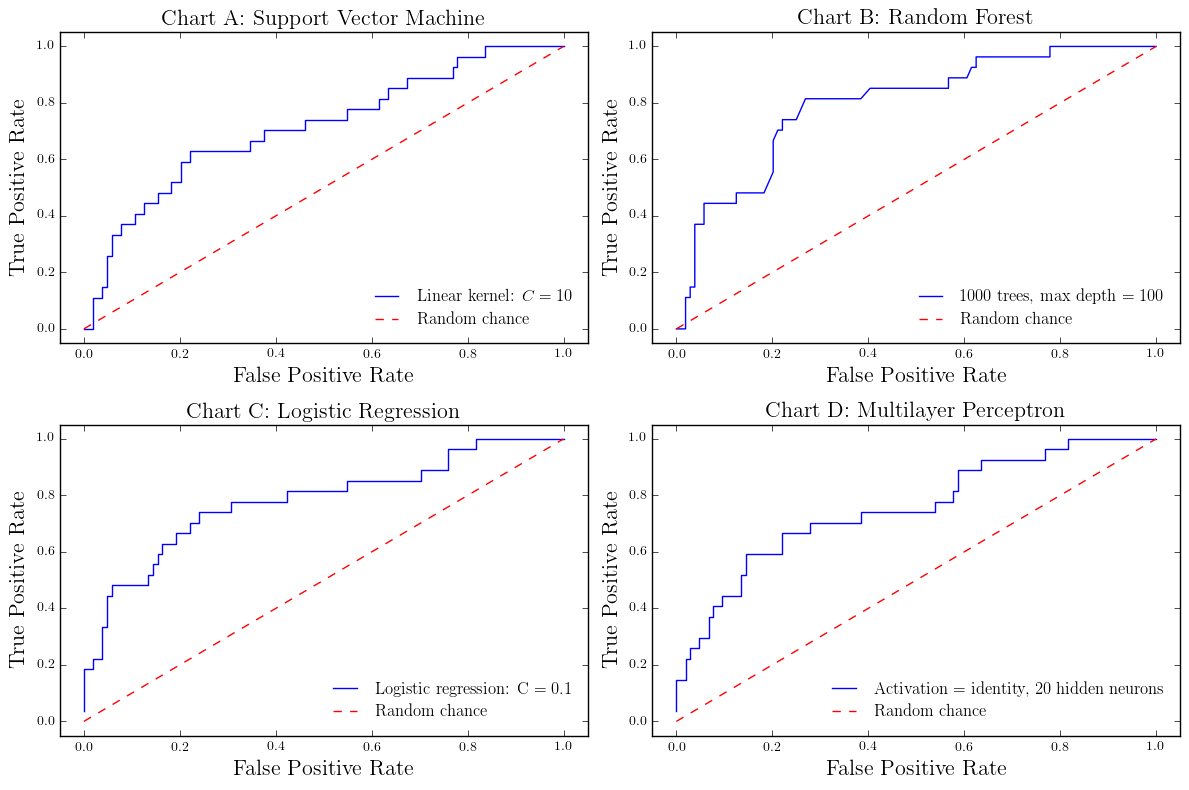

In [31]:
# plot ROC curves
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = False, sharey = False, figsize = (12, 8))

# Select top left subplot.
ax1 = plt.subplot(2, 2, 1)

ax1.plot(false_pos_rates['svm'].tolist(), true_pos_rates['svm'].tolist(), color = 'blue')
ax1.set_title('Chart A: Support Vector Machine', fontsize = 16)
ax1.set_xlabel('False Positive Rate', fontsize = 16)
ax1.set_ylabel('True Positive Rate', fontsize = 16)

ax1.set_xlim(-0.05, 1.05)
ax1.set_ylim(-0.05, 1.05)

ax1.plot(np.linspace(0, 1), np.linspace(0, 1), linestyle = '--', color = 'red')

ROC_curve = mlines.Line2D([], [], linestyle = '-', color = 'blue', label = r'Linear kernel: $C = ' + str(classifiers['svm'].best_estimator_.C) + '$')
rand_chance = mlines.Line2D([], [], linestyle = '--', color = 'red', label = r'Random chance')
plt.legend(handles = [ROC_curve, rand_chance], loc = 'lower right', frameon = False)

# Select top right subplot.
ax2 = plt.subplot(2, 2, 2)

ax2.plot(false_pos_rates['forest'].tolist(), true_pos_rates['forest'].tolist(), color = 'blue')
ax2.set_title('Chart B: Random Forest', fontsize = 16)
ax2.set_xlabel('False Positive Rate', fontsize = 16)
ax2.set_ylabel('True Positive Rate', fontsize = 16)

ax2.set_xlim(-0.05, 1.05)
ax2.set_ylim(-0.05, 1.05)

ax2.plot(np.linspace(0, 1), np.linspace(0, 1), linestyle = '--', color = 'red')

ROC_curve = mlines.Line2D([], [], linestyle = '-', color = 'blue', label = r'' + str(classifiers['forest'].best_estimator_.n_estimators) + ' trees, max depth $= ' + str(classifiers['forest'].best_estimator_.max_depth) + '$' )
rand_chance = mlines.Line2D([], [], linestyle = '--', color = 'red', label = r'Random chance')
plt.legend(handles = [ROC_curve, rand_chance], loc = 'lower right', frameon = False)

# Select bottom left subplot.
ax3 = plt.subplot(2, 2, 3)

ax3.plot(false_pos_rates['logistic'].tolist(), true_pos_rates['logistic'].tolist(), color = 'blue')
ax3.set_title('Chart C: Logistic Regression', fontsize = 16)
ax3.set_xlabel('False Positive Rate', fontsize = 16)
ax3.set_ylabel('True Positive Rate', fontsize = 16)

ax3.set_xlim(-0.05, 1.05)
ax3.set_ylim(-0.05, 1.05)

ax3.plot(np.linspace(0, 1), np.linspace(0, 1), linestyle = '--', color = 'red')

ROC_curve = mlines.Line2D([], [], linestyle = '-', color = 'blue', label = r'Logistic regression: C $= ' + str(classifiers['logistic'].best_estimator_.C) + '$')
rand_chance = mlines.Line2D([], [], linestyle = '--', color = 'red', label = r'Random chance')
plt.legend(handles = [ROC_curve, rand_chance], loc = 'lower right', frameon = False)

# Select bottom right subplot.
ax4 = plt.subplot(2, 2, 4)

ax4.plot(false_pos_rates['mlp'].tolist(), true_pos_rates['mlp'].tolist(), color = 'blue')
ax4.set_title('Chart D: Multilayer Perceptron', fontsize = 16)
ax4.set_xlabel('False Positive Rate', fontsize = 16)
ax4.set_ylabel('True Positive Rate', fontsize = 16)

ax4.set_xlim(-0.05, 1.05)
ax4.set_ylim(-0.05, 1.05)

ax4.plot(np.linspace(0, 1), np.linspace(0, 1), linestyle = '--', color = 'red')

ROC_curve = mlines.Line2D([], [], linestyle = '-', color = 'blue', label = r'Activation = ' + str(classifiers['mlp'].best_estimator_.activation) + r', ' + str(classifiers['mlp'].best_estimator_.hidden_layer_sizes[0]) + r' hidden neurons')
rand_chance = mlines.Line2D([], [], linestyle = '--', color = 'red', label = r'Random chance')
plt.legend(handles = [ROC_curve, rand_chance], loc = 'lower right', frameon = False)

plt.tight_layout()
plt.show()
fig.savefig('ROCCurvesSequenceBased.png', dpi = 1000)

In [16]:
# import package for calculating accuracy
from sklearn.metrics import accuracy_score

# print out accuracies for each method
for method in methods:
    print(method, 'accuracy =', accuracy_score(y_test, classifiers[method].best_estimator_.predict(X_test)))

svm accuracy = 0.809160305344
forest accuracy = 0.793893129771
logistic accuracy = 0.801526717557
mlp accuracy = 0.809160305344


In [17]:
ROC_lines = {}
best_perf = {}
best_dist = {}
best_index = {}
best_thresholds = {}

for method in methods:
    ROC_lines[method] = list(zip(false_pos_rates[method], true_pos_rates[method]))
    best_perf[method] = (1, 0)
    best_dist[method] = 1
    best_index[method] = 0
    for i in range(0, len(ROC_lines[method])):
        new_dist = np.sqrt((0 - ROC_lines[method][i][0]) + (1 - ROC_lines[method][i][1]))
        if (new_dist < best_dist[method]):
            best_perf[method] = ROC_lines[method][i]
            best_index[method] = i
    # find best probability threshold
    best_thresholds[method] = thresholds[method][best_index[method]]
    print(method, 'best probability threshold =', best_thresholds[method])

svm best probability threshold = 0.162783375707
forest best probability threshold = 0.174
logistic best probability threshold = 0.206311982674
mlp best probability threshold = 0.148417917253


In [18]:
binary_predictions = {}

for method in methods:
    binary_predictions[method] = []
    for probability in predicted_pos[method]:
        if (probability >= best_thresholds[method]):
            binary_predictions[method].append(1)
        else:
            binary_predictions[method].append(0)

In [19]:
# print number of amyloids in test set
y_test.sum()

27

In [20]:
# import package for calculating confusion matrices
from sklearn.metrics import confusion_matrix

# print out confusion matrix for each machine learning method
for method in methods:
    print(method, 'confusion matrix =', confusion_matrix(y_test, binary_predictions[method]))

svm confusion matrix = [[68 36]
 [10 17]]
forest confusion matrix = [[78 26]
 [ 7 20]]
logistic confusion matrix = [[79 25]
 [ 7 20]]
mlp confusion matrix = [[75 29]
 [ 8 19]]


In [21]:
# import package for calculating accuracy
from sklearn.metrics import accuracy_score

# print out accuracies for each method
for method in methods:
    print(method, 'accuracy =', accuracy_score(y_test, binary_predictions[method]))

svm accuracy = 0.648854961832
forest accuracy = 0.748091603053
logistic accuracy = 0.75572519084
mlp accuracy = 0.717557251908


In [24]:
# import package for calculating Matthews correlation coefficient
from sklearn.metrics import matthews_corrcoef

# print Matthews correlation coefficients
for method in methods:
    print(method, 'MCC =', matthews_corrcoef(y_test, binary_predictions[method]))

svm MCC = 0.233630360904
forest MCC = 0.415874495608
logistic MCC = 0.426208679865
mlp MCC = 0.356682849131


In [23]:
# import pickling library to save trained machine learning classifiers to file
import pickle

fileObject = open('Pickle_Classifiers_Sequence_Based','wb') 
pickle.dump(classifiers, fileObject)   
fileObject.close()

fileObject = open('Pickle_Results_Sequence_Based','wb') 
pickle.dump(results, fileObject)   
fileObject.close()

fileObject = open('Pickle_X_test_Sequence_Based','wb') 
pickle.dump(X_test, fileObject)   
fileObject.close()

fileObject = open('Pickle_y_test_Sequence_Based','wb') 
pickle.dump(y_test, fileObject)   
fileObject.close()